In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = '^NSEI'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0


In [3]:
price = data['Close']
price

Date
2010-01-04     5232.200195
2010-01-05     5277.899902
2010-01-06     5281.799805
2010-01-07     5263.100098
2010-01-08     5244.750000
                  ...     
2023-05-08    18264.400391
2023-05-09    18265.949219
2023-05-10    18315.099609
2023-05-11    18297.000000
2023-05-12    18314.800781
Name: Close, Length: 3277, dtype: float64

<AxesSubplot: xlabel='Date'>

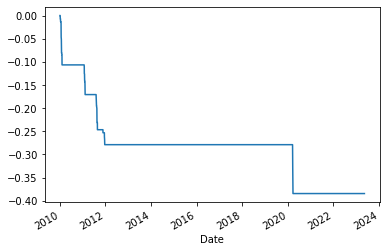

In [4]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [5]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -38.43985245274211 %


In [6]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00873432,  0.00073891, ...,  0.00269082,
       -0.00098823,  0.00097288])

In [7]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00873432, 1.00947968, ..., 3.50045849, 3.49699922,
       3.50040138])

In [8]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 350.0401379453741%


In [9]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.246181
2012-12-31    0.276972
2013-12-31    0.067552
2014-12-31    0.313880
2015-12-31   -0.040609
2016-12-31    0.030133
2017-12-31    0.286460
2018-12-31    0.031513
2019-12-31    0.120220
2020-12-31    0.149016
2021-12-31    0.241193
2022-12-31    0.043290
2023-12-31    0.011571
Freq: A-DEC, Name: Close, dtype: float64

In [10]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.008244
2010-03-31    0.066392
2010-04-30    0.005506
2010-05-31   -0.036321
                ...   
2023-01-31   -0.024476
2023-02-28   -0.020281
2023-03-31    0.003225
2023-04-30    0.040626
2023-05-31    0.013828
Freq: M, Name: Close, Length: 161, dtype: float64

In [11]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 9.884688903224669%


In [12]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 5.865514495786444


In [13]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.036321
2010-10-31   -0.002032
2010-11-30   -0.025757
2011-01-31   -0.102470
2011-02-28   -0.031357
                ...   
2022-06-30   -0.048497
2022-09-30   -0.037442
2022-12-31   -0.034814
2023-01-31   -0.024476
2023-02-28   -0.020281
Name: Close, Length: 70, dtype: float64

In [14]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 8.507984933461424
